In [1]:
import os
import sys
sys.path.append('/home/mark/Documents/code/drone')
import pickle
import numpy as np
import scipy.optimize as opt
from solver import *
import networkx as nx
import gurobipy as gp
from gurobipy import GRB


main_seed = np.random.RandomState(10)
out_path = '/home/mark/Documents/code/drone/figures/temp/'



# num_iters = 100
# epsilon = 1e-10

# n = main_seed.randint(4,7)
# G = gnp_random_connected_digraph(n, 0.5, main_seed)
# m = G.number_of_edges()
# paths = create_paths(G)
# p = len(paths)
# Gamma = 0.99


In [2]:
net_params = {}
net_params['A'] = np.array([[0,1,1,0],
                            [0,0,0,1],
                            [0,0,0,1],
                            [1,0,0,0]])

net_params['flow_c'] = np.array([[0,2000,2000,0],
                                 [0,0,0,3000],
                                 [0,0,0,3000],
                                 [4000,0,0,0]])

net_params['capacity'] = np.array([[0,1000,2000,0],
                                   [0,0,0,3000],
                                   [0,0,0,2000],
                                   [4000,0,0,0]])

net_params['lanes'] = np.array([[0,2,2,0],
                                [0,0,0,3],
                                [0,0,0,2],
                                [4,0,0,0]]) 

net_params['l_road'] = np.array([[0,2,2,0],
                                 [0,0,0,2],
                                 [0,0,0,2],
                                 [4,0,0,0]]) 

net_params['l_drone'] = np.array([1.2,1.2,4.8])

G = nx.DiGraph(net_params['A'])
pos = nx.planar_layout(G)
pos[0] = np.array([0,0])
pos[3] = np.array([5,0])
pos[1] = np.array([3,2])
pos[2] = np.array([3,-2])

net_params['pos'] = pos

In [3]:
optim_params = {}
# set random variables for now
omega = {2:np.array([15.75812964, 0.02109056]), 
         3:np.array([4.26392855, 0.06173418]),
         4:np.array([1.91730372, 0.05962975])}

optim_params['omega'] = omega        
optim_params['D_v'] = np.array([10000,10000,10000])
optim_params['p_per_truck'] = 125
optim_params['C_0'] = 14000
# optim_params['C_max'] = 12000
optim_params['c_t'] = 30
optim_params['c_d'] = 0.5
optim_params['Beta'] = 14000
optim_params['Gamma'] = 1
optim_params['cutoff'] = 1
optim_params['MIP_gap'] = 0.00001

In [4]:
fig_params = {}

fig_params['ORANGE'] = '#FF9132'
fig_params['TEAL'] = '#0598B0'
fig_params['GREEN'] = '#008F00'
fig_params['PURPLE'] = '#8A2BE2'
fig_params['GRAY'] = '#969696'

fig_params['N_COLOR'] = [fig_params['GREEN']]+[fig_params['ORANGE']]*len(net_params['l_drone']) 
fig_params['N_SIZE'] = 100
fig_params['N_FSIZE'] = 8
fig_params['E_FSIZE'] = 6
fig_params['E_WIDTH'] = 2
fig_params['E_ALPHA'] = 0.9
fig_params['E_COLOR'] = fig_params['GRAY']
fig_params['ARROW_SIZE'] = 10
fig_params['FIG_W'] = 4
fig_params['FIG_H'] = 4
fig_params['arc_rad'] = 0.1

fig_params['rc_params'] = {
        "text.usetex": True,
        "font.family": "serif",
        "font.serif": ["Palatino"],
        "font.size": 8,
        "axes.titlesize": 10,
        "axes.spines.right": False,
        "axes.spines.top": False,
        "lines.linewidth": 2}

fig_params['axs_params'] = {
        'widths': [0.9,0.0125,0.05,0.0125],
        'heights': [0.5,0.5],
        'l':-0.03,
        'r':0.88,
        't':0.95,
        'b':0.04,
        'wspace':0,
        'hspace':0.1}

In [5]:
CONVEX = False
INTEGER = False

Set parameter Username
Academic license - for non-commercial use only - expires 2022-07-26
Set parameter NonConvex to value 2
Set parameter MIPGap to value 1e-05


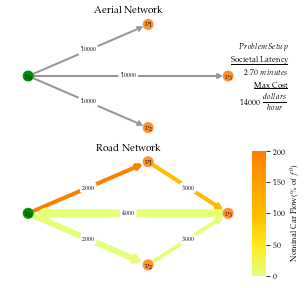

In [6]:
# print(net_params)
my_solver = net_solver(net_params,optim_params,fig_params,CONVEX,INTEGER)
my_solver.visualize('Problem Setup', False, '/home/mark/Documents/code/drone/optim/results/toy_nosol.pdf')


In [7]:
my_solver.optimize()

Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 4 rows, 3 columns and 6 nonzeros
Model fingerprint: 0x6f0a8324
Model has 4 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [3e-03, 3e-03]
  QObjective range [1e-05, 1e-04]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+01, 1e+04]
Presolve removed 3 rows and 0 columns

Continuous model is non-convex -- solving as a MIP

Presolve removed 3 rows and 0 columns
Presolve time: 0.00s
Presolved: 4 rows, 8 columns, 12 nonzeros
Presolved model has 3 quadratic constraint(s)
Presolved model has 1 bilinear constraint(s)
Variable types: 8 continuous, 0 integer (0 binary)

Root relaxation: objective -2.666667e-01, 0 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    Bes

X :	 [0.0, 0.0, 80.0]
flow_t :	 [80.  0. 80.  0.  0.]
flow_st :	 [ 0.  0. 40.  0. 40.]
demand_t :	 [    0.     0. 10000.]
flow_d :	 [10000. 10000.     0.]
price :	 12400.0
avg_s_l :	 2.7451351548
avg_p_l :	 2.2427341135111107


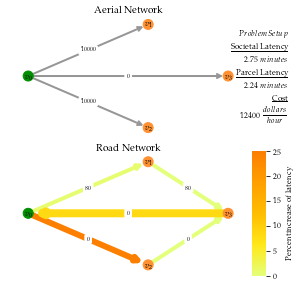

In [8]:
for key in my_solver.solution.keys():
    print(key,':\t',my_solver.solution[key])

my_solver.visualize('Problem Setup', True, '/home/mark/Documents/code/drone/optim/results/toy_sol_gamma1.pdf')

In [9]:
optim_params['Gamma'] = 0
my_solver = net_solver(net_params,optim_params,fig_params,CONVEX,INTEGER)
my_solver.optimize()


Set parameter NonConvex to value 2
Set parameter MIPGap to value 1e-05
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (linux64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 4 rows, 3 columns and 6 nonzeros
Model fingerprint: 0xe3474093
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [6e-04, 3e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+01, 1e+04]
Presolve removed 3 rows and 0 columns
Presolve time: 0.00s
Presolved: 1 rows, 3 columns, 3 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   3.846154e+00   0.000000e+00      0s
       1    1.8255751e-02   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.00 seconds (0.00 work units)
Optimal objective  1.825575075e-02


X :	 [0.0, 0.0, 30.76923076923077]
flow_t :	 [30.76923077  0.         30.76923077  0.          0.        ]
flow_st :	 [ 0.          0.         15.38461538  0.         15.38461538]
demand_t :	 [   0.            0.         3846.15384615]
flow_d :	 [10000.         10000.          6153.84615385]
price :	 14000.000000000002
avg_s_l :	 2.7159259536043954
avg_p_l :	 2.3300163363182116


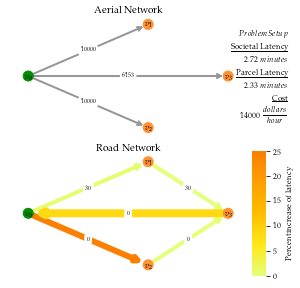

In [10]:
for key in my_solver.solution.keys():
    print(key,':\t',my_solver.solution[key])

my_solver.visualize('Problem Setup', True, '/home/mark/Documents/code/drone/optim/results/toy_sol_gamma0.pdf')

In [11]:
# print(my_solver.paths)

# for i_path in range(len(my_solver.paths)):
#     # final edge in path
#     end_edge = (my_solver.paths[i_path][-2],my_solver.paths[i_path][-1])
#     print(end_edge)
print(my_solver.G.out_edges())
for node in range(my_solver.G.number_of_nodes()-1):
    print(node)
    print('------'*8)
    for edge in my_solver.G.out_edges(node+1):
        print(edge)
        print()

[(0, 1), (0, 2), (1, 3), (2, 3), (3, 0)]
0
------------------------------------------------
(1, 3)

1
------------------------------------------------
(2, 3)

2
------------------------------------------------
(3, 0)



In [12]:
k = 3
k *= 3-1
k

6